In [4]:
# Imports 
library("openxlsx")
library("readxl")
library("ggplot2")
library("tidyr")
library("dplyr")

In [5]:
# Read the data
data <- read_excel("econ.xlsx")

# Convert the tempo column to a Date object
data$tempo <- as.Date(data$tempo, format = "%y-%m-%d")

# Extract the year from the Date object
data$year <- format(data$tempo, "%Y")

# Filter data for years greater than or equal to 1968
data_filtered <- data[data$year >= 1968,]

X1 <- data_filtered$gcp
X2 <- data_filtered$ndesemp

In [6]:
# transformação de dados
z_transform <- function(x){
  (x - mean(x))/sd(x)
}

z_gcp <- z_transform(X1)
z_ndesemp <- z_transform(X2)

`geom_smooth()` using formula = 'y ~ x'


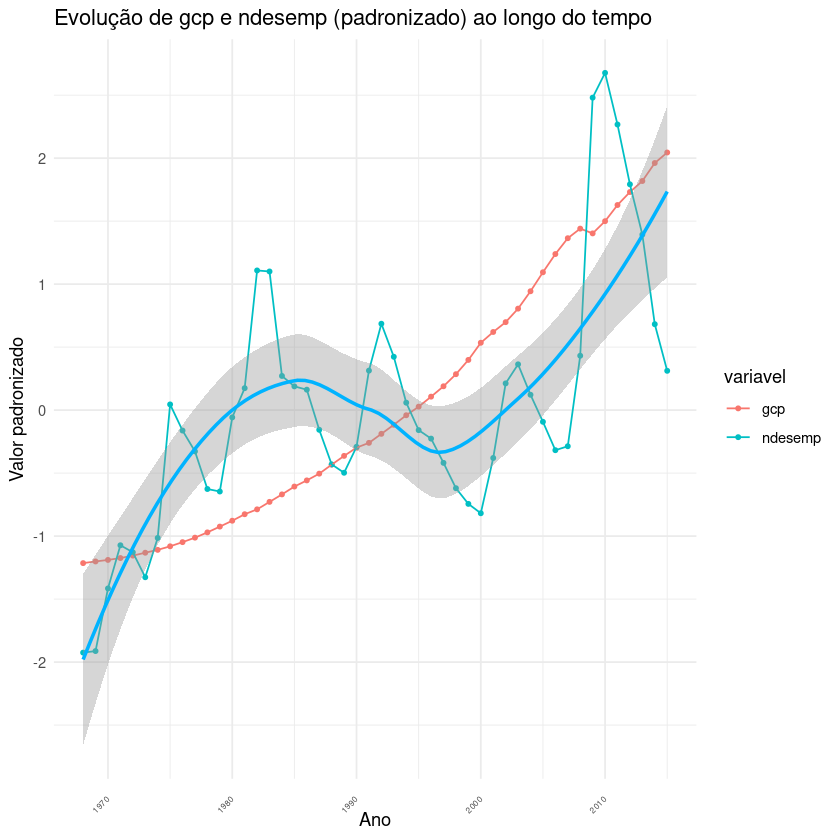

In [18]:
# Create a new data frame with transformed data
df <- data.frame(tempo = data_filtered$tempo, year = data_filtered$year, z_gcp, z_ndesemp)

# Aggregating the data by year
df_yearly <- df %>% group_by(year) %>% summarise(z_gcp = mean(z_gcp), z_ndesemp = mean(z_ndesemp))

# Changing to long format for ggplot
df_long_yearly <- gather(df_yearly, key = "variavel", value = "valor", -year)

# Create a ggplot with the evolution of the two variables over time
p <- ggplot(df_long_yearly, aes(x = as.numeric(year), y = valor, color = variavel)) + 
     geom_point(size = 1) +
     geom_line() + 
     geom_smooth(data = df_long_yearly[df_long_yearly$variavel == "z_ndesemp",], 
                 method = "loess", se = TRUE, linetype = "solid", color = "#00b3ff") +
     labs(title = "Evolução de gcp e ndesemp (padronizado) ao longo do tempo", x = "Ano", y = "Valor padronizado") + 
     scale_color_discrete(labels = c("gcp", "ndesemp")) +
     theme_minimal() +
     theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust = 1, size = 5))

p